# Analysis of Multiple Linear Regression Models for Predicting the Price of Diamonds

## STAT 301 Final Project Report (Group 25)

## 1. Introduction


### 1.1. Background Information

Renowned for their optical allure, diamonds are globally valued as gemstone investments (Santini, 2009; Spar, 2006). Despite being recognized more as emotional investments (Dimson & Spaenjers, 2011; Dimson & Spaenjers, 2014), we ponder whether the price of diamonds correlates with inherent characteristics such as carat and size, serving as predictors of their value.

In this project, we aim to predict a diamond's price. Specifically, we focus on evaluating multiple linear regression models, recognizing the challenge of determining the optimal method for selecting explanatory variables. To address this uncertainty, we explore various selection methods learned during the course, aiming to identify the most effective approach for our predictive model.

### 1.2. Project Question

Which among learned selection methods - forward, backward, hybrid, LASSO, and manual selection — has the optimal performance at identifying the best variables for linear regression to predicting a diamond's price? We will select the model that has the best performance (lowest RMSE) on a validation set and measure its RMSE on a test set.

### 1.3. Data Set Information

The dataset we'll use is from Kaggle (https://www.kaggle.com/datasets/shivam2503/diamonds/data) by Shivam Agrawal. The data itself is compiled from Tiffany & Co's snapshot pricelist from 2017. The variables are as follow:

| Name       | Description                                                                                                                                                  | Variable Type |
|------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------|
| Carat      | Carat weight of the diamond                                                                                                                                  | Numeric       |
| Cut        | Cut quality of the diamond. In increasing quality: Fair, Good, Very Good, Premium, Ideal                                                       | Categorical   |
| Color      | Color grade of the diamond. In increasing quality: J, I, H, G, F, E, D                                                                                                  | Categorical   |
| Clarity    | How obvious inclusions are within the diamond: In increasing quality: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF                               | Categorical   |
| Depth      | Height of a diamond, measured from the culet to the table, divided by its average girdle diameter                                                 | Numeric       |
| Table      | Width of the diamond's table expressed as a percentage of its average diameter                                                                    | Numeric       |
| Length mm  | Length of the diamond in mm                                                                                                                                   | Numeric       |
| Width mm   | Width of the diamond in mm                                                                                                                                    | Numeric       |
| Depth mm   | Depth of the diamond in mm                                                                                                                                    | Numeric       |
| Price      | Price of the diamond                                                                                                                                      | Numeric       |


## 2. Methods and Results

We will start by importing all of the necessary packages for the code below:

In [1]:
# For Google Colab
suppressMessages(install.packages("car")) # for VIF
suppressMessages(install.packages("splitTools")) # for splitting data
suppressMessages(install.packages("leaps")) # for regsubsets
suppressMessages(install.packages("Metrics")) # for rmse
suppressMessages(install.packages("glmnet")) # for lasso
suppressMessages(install.packages("cowplot")) # for plot_grid
suppressMessages(install.packages("ggpubr")) # for ggarrange
suppressMessages(install.packages("GGally")) # for ggpairs

In [2]:
options(readr.num_columns = 0, warn = -1, repr.plot.width=25, repr.plot.height=8, message = FALSE)
library(tidyverse)
library(car)
library(splitTools)
library(leaps)
library(broom)
library(Metrics)
library(glmnet)
library(cowplot)
library(ggpubr)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching

### 2.1. Exploratory Data Analysis (EDA)

We will import the dataset and save it in an object here:

In [3]:
path <- "https://raw.githubusercontent.com/yingquanw/STAT301_project/main/diamonds.csv"
diamonds_original <- read.csv(path, row.names = 1)

In [4]:
# Exploring the shape of the dataset
"Table 1. Raw Diamond Data"
glimpse(diamonds_original)

[1] "Table 1. Raw Diamond Data"

Rows: 53,940
Columns: 10
$ carat   <dbl> 0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.24, 0.26, 0.22, 0.23, 0.…
$ cut     <chr> "Ideal", "Premium", "Good", "Premium", "Good", "Very Good", "V…
$ color   <chr> "E", "E", "E", "I", "J", "J", "I", "H", "E", "H", "J", "J", "F…
$ clarity <chr> "SI2", "SI1", "VS1", "VS2", "SI2", "VVS2", "VVS1", "SI1", "VS2…
$ depth   <dbl> 61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64…
$ table   <dbl> 55, 61, 65, 58, 58, 57, 57, 55, 61, 61, 55, 56, 61, 54, 62, 58…
$ price   <int> 326, 326, 327, 334, 335, 336, 336, 337, 337, 338, 339, 340, 34…
$ x       <dbl> 3.95, 3.89, 4.05, 4.20, 4.34, 3.94, 3.95, 4.07, 3.87, 4.00, 4.…
$ y       <dbl> 3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 3.98, 4.11, 3.78, 4.05, 4.…
$ z       <dbl> 2.43, 2.31, 2.31, 2.63, 2.75, 2.48, 2.47, 2.53, 2.49, 2.39, 2.…


In [5]:
anyNA(diamonds_original)

[1] FALSE

- *Insight:* The dataset comprises 10 columns and 53,940 rows of clean data, with no null entries. This eliminates the need for discarding or imputing missing values.

In [6]:
# Summarizing each variable in the dataset
"Table 2. Summary Table on Raw Diamond Data"
summary(diamonds_original)

[1] "Table 2. Summary Table on Raw Diamond Data"

     carat            cut               color             clarity         
 Min.   :0.2000   Length:53940       Length:53940       Length:53940      
 1st Qu.:0.4000   Class :character   Class :character   Class :character  
 Median :0.7000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.7979                                                           
 3rd Qu.:1.0400                                                           
 Max.   :5.0100                                                           
     depth           table           price             x         
 Min.   :43.00   Min.   :43.00   Min.   :  326   Min.   : 0.000  
 1st Qu.:61.00   1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710  
 Median :61.80   Median :57.00   Median : 2401   Median : 5.700  
 Mean   :61.75   Mean   :57.46   Mean   : 3933   Mean   : 5.731  
 3rd Qu.:62.50   3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.: 6.540  
 Max.   :79.00   Max.   :95.00   Max.   :18823   Max.   :10.740  
       y     

In [7]:
nrow(diamonds_original)

[1] 53940

In [8]:
diamonds <- diamonds_original %>%
  filter(x != 0, y != 0, z != 0)

In [9]:
nrow(diamonds)

[1] 53920

- *Insight:* We noticed that `x` (length), `y` (width), and `z` (height) are equal to 0 for some diamonds which is not possible in real life. To maintain data quality, we'll remove these rows with `x`, `y` or `z` equal to 0. In total, we removed 20 invalid rows.

#### 2.1.1. Numerical Variables

We will first explore the distribution of all of the numerical variables in the dataset:

In [10]:
options(repr.plot.width=10, repr.plot.height=10)

carat_hist <- ggplot(diamonds_original, aes(x = carat)) +
  geom_histogram(binwidth = 0.1, fill = "blue", color = "black") +
  labs(title = "Figure 1. Histogram of Diamond's Carats",
       x = "Carat",
       y = "Frequency")

depth_hist <- ggplot(diamonds_original, aes(x = depth)) +
  geom_histogram(binwidth = 0.5, fill = "blue", color = "black") +
  labs(title = "Figure 2. Histogram of Diamond's Depth",
       x = "Depth (%)",
       y = "Frequency")

table_hist <- ggplot(diamonds_original, aes(x = table)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Figure 3. Histogram of Diamond's Table",
       x = "Table (%)",
       y = "Frequency")

length_hist <- ggplot(diamonds_original, aes(x = x)) +
  geom_histogram(binwidth = 0.2, fill = "blue", color = "black") +
  labs(title = "Figure 4. Histogram of Diamond's Length",
       x = "Length (mm)",
       y = "Frequency")


width_hist <- ggplot(diamonds, aes(x = y)) +
  geom_histogram(binwidth = 0.5, fill = "blue", color = "black") +
  labs(title = "Figure 5. Histogram of Diamond's Width",
       x = "Width (mm)",
       y = "Frequency")

height_hist <- ggplot(diamonds_original, aes(x = z)) +
  geom_histogram(binwidth = 0.5, fill = "blue", color = "black") +
  labs(title = "Figure 6. Histogram of Diamond's Height",
       x = "Height (mm)",
       y = "Frequency")

price_hist <- ggplot(diamonds_original, aes(x = price)) +
  geom_histogram(binwidth = 500, fill = "orange", color = "black") +
  labs(title = "Figure 7. Histogram of Diamond's Price",
       x = "Price ($USD)",
       y = "Frequency")

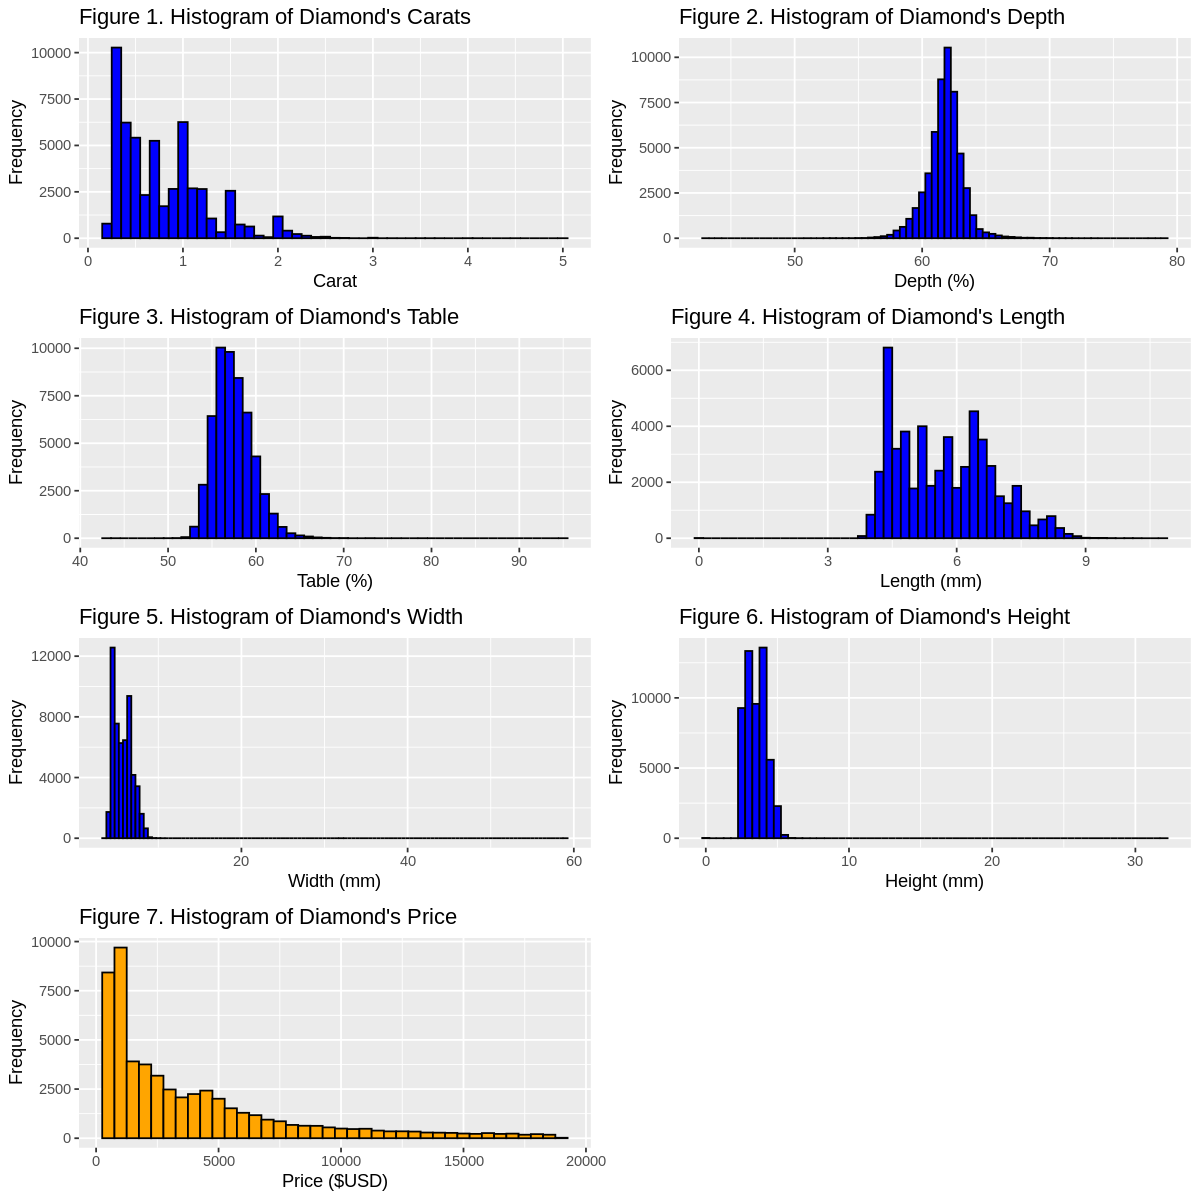

In [11]:
plot_grid(carat_hist, depth_hist, table_hist, length_hist, width_hist, height_hist, price_hist, cols = 2)

- **`carat` (Figure 1)**: A numeric variable representing the weight of the diamond, with values ranging from 0.2 to 5.01 carats. The median carat weight is 0.7, which is less than the mean carat weight of 0.7977. From the histogram, we know it has a right-skewed distribution (larger diamonds are rarer, but they have a significant impact on the average). We think the carat of a diamond is a fundamental factor in determining its price. We would expect the larger the carat, the more expensive the diamond, because large diamonds are rarer (Gemological Institute of America, n.d.).

- **`depth` (Figure 2)**: A numeric variable that represents the depth percentage (total depth divided by the average width) of diamonds. The values range from 43% to 79%, with the median almost equal to the mean, suggesting a roughly symmetric distribution around the central value.

- **`table` (Figure 3)**: This numeric variable represents the width of the diamond's table (the top flat facet) expressed as a percentage of the average diameter. The values range from 43% to 95%, with the mean slightly higher than the median and with the shape of histogram, we know it has a slight right skew.

- **`x`, `y`, `z` (Figure 4,5,6)**: For x (length) and y (width), the minimum values are 3.73mm and 3.68mm respectively, which seem reasonable, but the maximum values of y (58.9mm) and z (31.8mm) are unusually high compared to their 3rd quartiles (6.54mm), indicating we have some huge diamonds. The median and mean values for these dimensions are quite close to each other, suggesting that the data might be symmetrically distributed except for the outliers. Again, we would expect larger diamonds to be more expensive than smaller diamonds (Gemological Institute of America, n.d.).

- **`price` (Figure 7)**: The price of diamonds ranges from 326 USD to 18,823 USD. From the plot, we noticed that the distribution of the price is very right skewed, which means that most of the diamonds are "relatively cheap" with a few very high-priced diamonds. The large difference between the mean price 3,931 USD and median price 2,401 USD also supports what we observed from the plot.

#### 2.1.2. Correlation of Numerical Variables

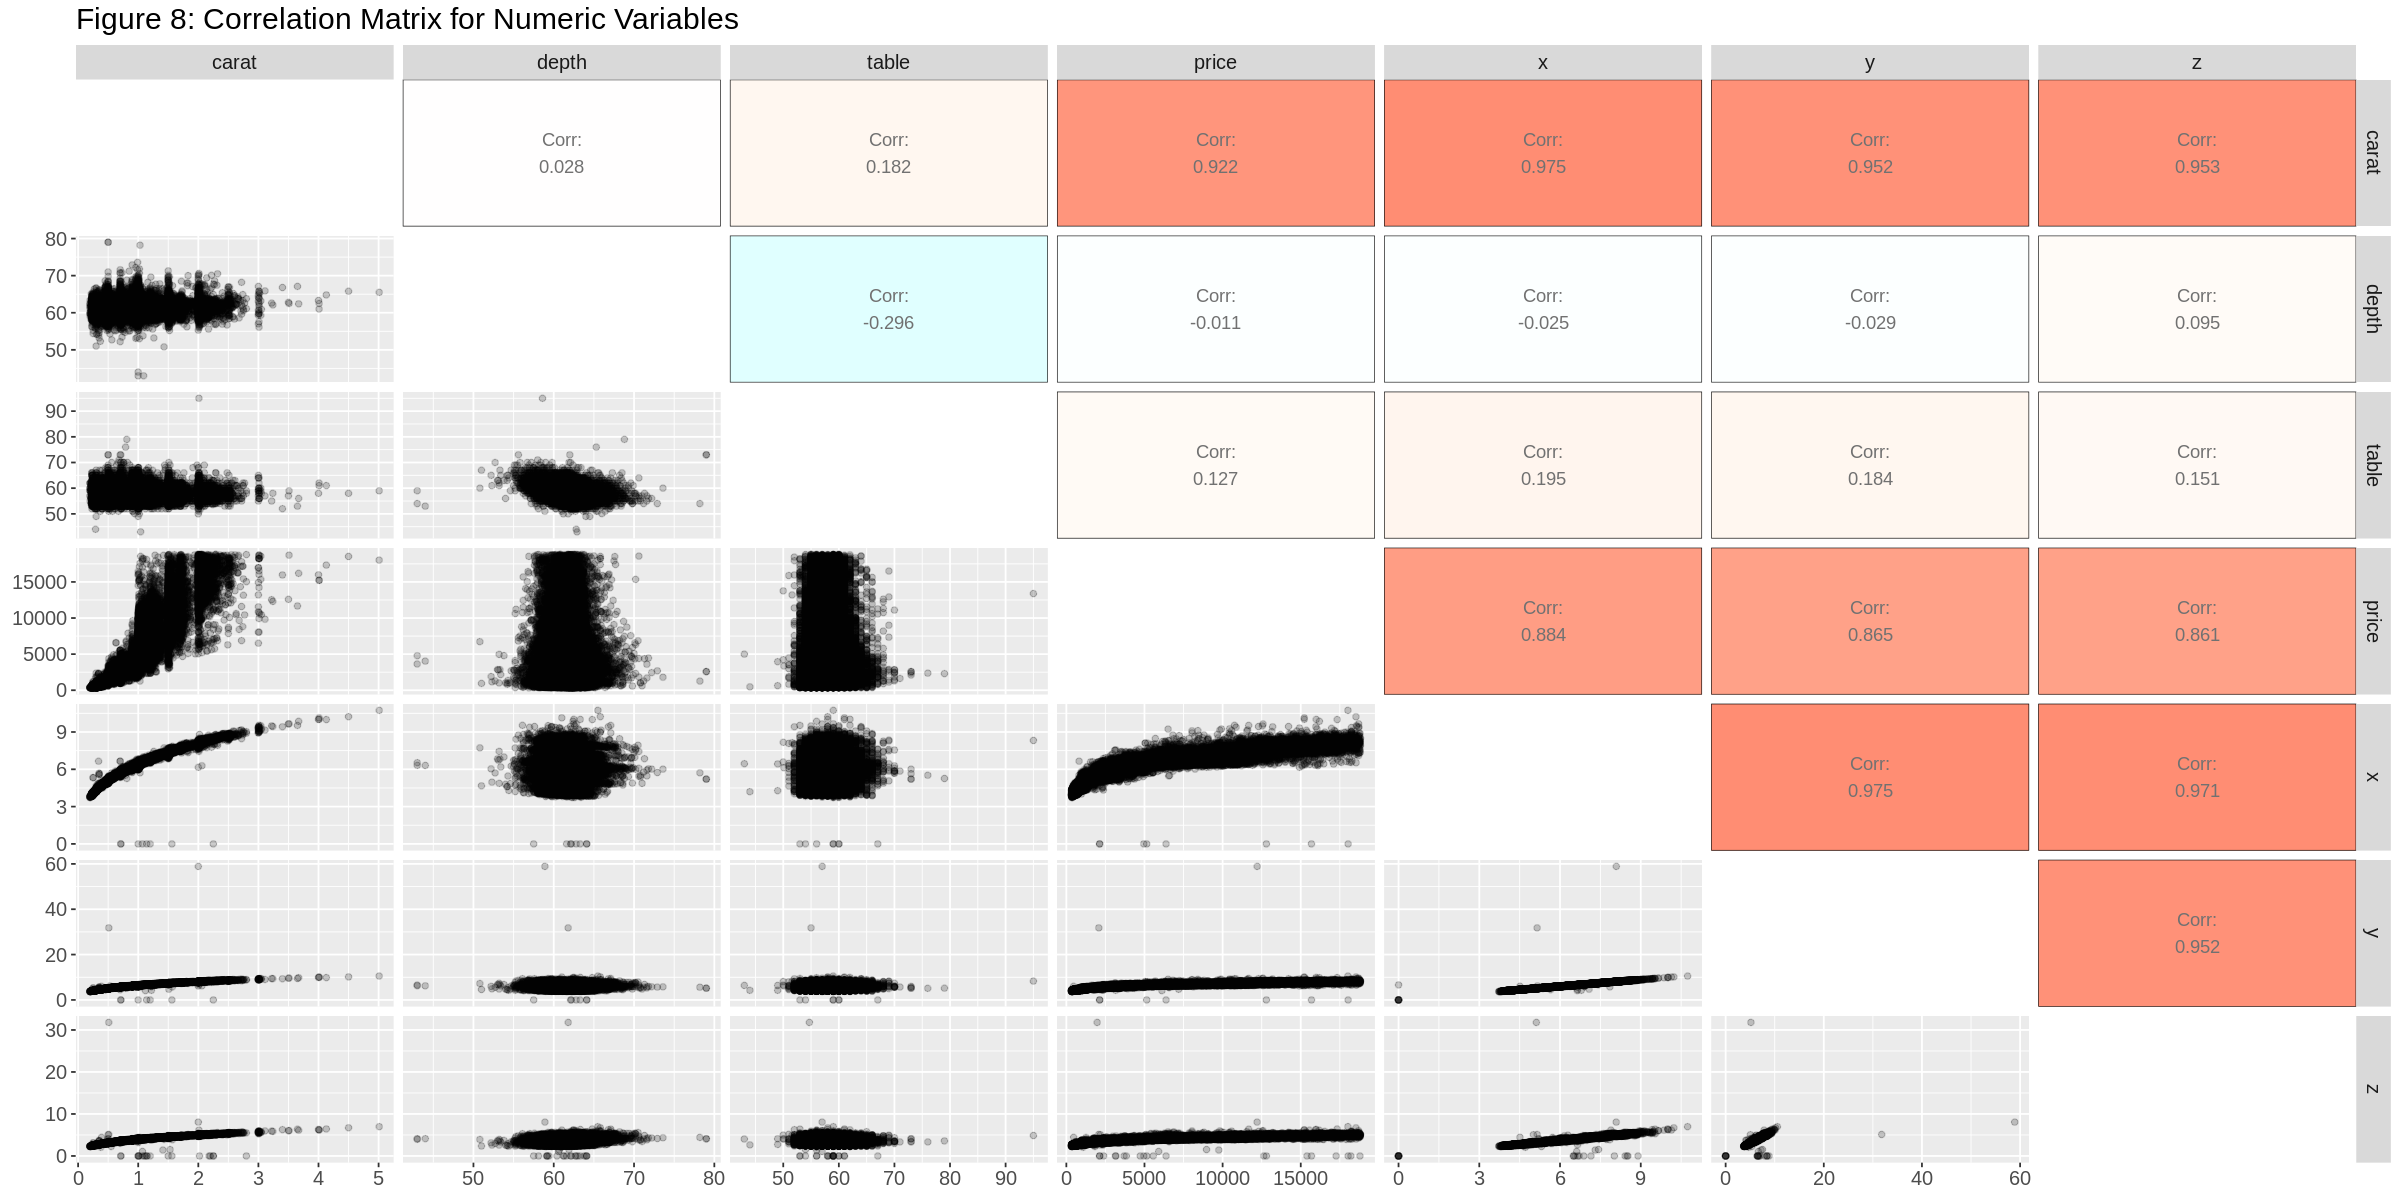

In [12]:
options(repr.plot.width=20, repr.plot.height=10)

diamonds_numeric <- diamonds_original %>% select(-cut, -color, -clarity)

# function to color code correlation values to spot trends faster
my_fn <- function(data, mapping, method="p", use="pairwise") {

    x <- eval_data_col(data, mapping$x)
    y <- eval_data_col(data, mapping$y)

    corr <- cor(x, y, method=method, use=use)

    colFn <- colorRampPalette(c("#6bc2ff", "white", "#ff856b"), interpolate ='spline')
    fill <- colFn(100)[findInterval(corr, seq(-1, 1, length=100))]

    ggally_cor(data = data, mapping = mapping, stars = FALSE) +
    theme_void() +
    theme(panel.background = element_rect(fill=fill))
    }

# Plot matrix
eda_matrix <- ggpairs(diamonds_numeric,
    upper = list(continuous = my_fn),
    lower = list(continuous = wrap("points", alpha = 0.2, binwidth = 30)),
    diag = "blank",
    lab_size = 10,
    title = "Figure 8: Correlation Matrix for Numeric Variables") +
    theme(text = element_text(size = 15))

eda_matrix

- **`carat`**: A correlation of ~0.92 with `price` indicates a very strong positive relationship between `carat` and `price`. As the weight of the diamond increases, its price tends to increase as well. This is expected since larger diamonds are rarer and in higher demand (Gemological Institute of America, n.d.).

- **Dimensions (`x`, `y`, `z`)**: All these dimensions have strong positive correlations with price as their correlation coefficients are all over 0.85. This indicates that the overall size of the diamond is a strong predictor of price. Since these dimensions contribute to the carat weight, it is consistent that they would also be strongly related to price.

- **`table`**: This has a very weak positive correlation of about 0.13 with `price`. It suggests that a larger table may have a slight positive effect on `price`, but there are likely other factors that are more influential.

- **`depth`**: It has correlation of about -0.01 with `price`, which means that it might not be a good variable to use to predict `price`.

The correlation plot is a powerful tool for swiftly identifying potential predictors in our regression models aimed at predicting `price`. It's important to note that correlation does not imply causation. We'll also address the potential impact of multicollinearity among predictor variables in 2.2. Methods: Plan.

#### 2.1.3. Categorical Variables

In [13]:
options(repr.plot.width=15, repr.plot.height= 8)

cut_summary <- diamonds_original %>%
  group_by(cut) %>%
  summarise(Count = n()) %>%
  mutate(freq = Count / sum(Count))

# Pie chart for cut quality
pie_cut <- ggplot(cut_summary, aes(x = "", y = freq, fill = cut)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(fill = "Cut", title = "Figure 9. Pie Chart of Diamond Cut Quality") +
  geom_label(aes(label = scales::percent(freq)), position = position_stack(vjust = 0.4)) +
  theme(legend.position = "right")

color_summary <- diamonds_original %>%
  group_by(color) %>%
  summarise(Count = n()) %>%
  mutate(freq = Count / sum(Count))

# Pie chart for color grade
pie_color <- ggplot(color_summary, aes(x = "", y = freq, fill = color)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(fill = "Color", title = "Figure 10. Pie Chart of Diamond Color Grade") +
  geom_label(aes(label = scales::percent(freq)), position = position_stack(vjust = 0.4)) +
  theme(legend.position = "right")

clarity_summary <- diamonds_original %>%
  group_by(clarity) %>%
  summarise(Count = n()) %>%
  mutate(freq = Count / sum(Count))

# Pie chart for clarity
pie_clarity <- ggplot(clarity_summary, aes(x = "", y = freq, fill = clarity)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(fill = "Clarity", title = "Figure 11. Pie Chart of Diamond Clarity") +
  geom_label(aes(label = scales::percent(freq)), position = position_stack(vjust = 0.4)) +
  theme(legend.position = "right")

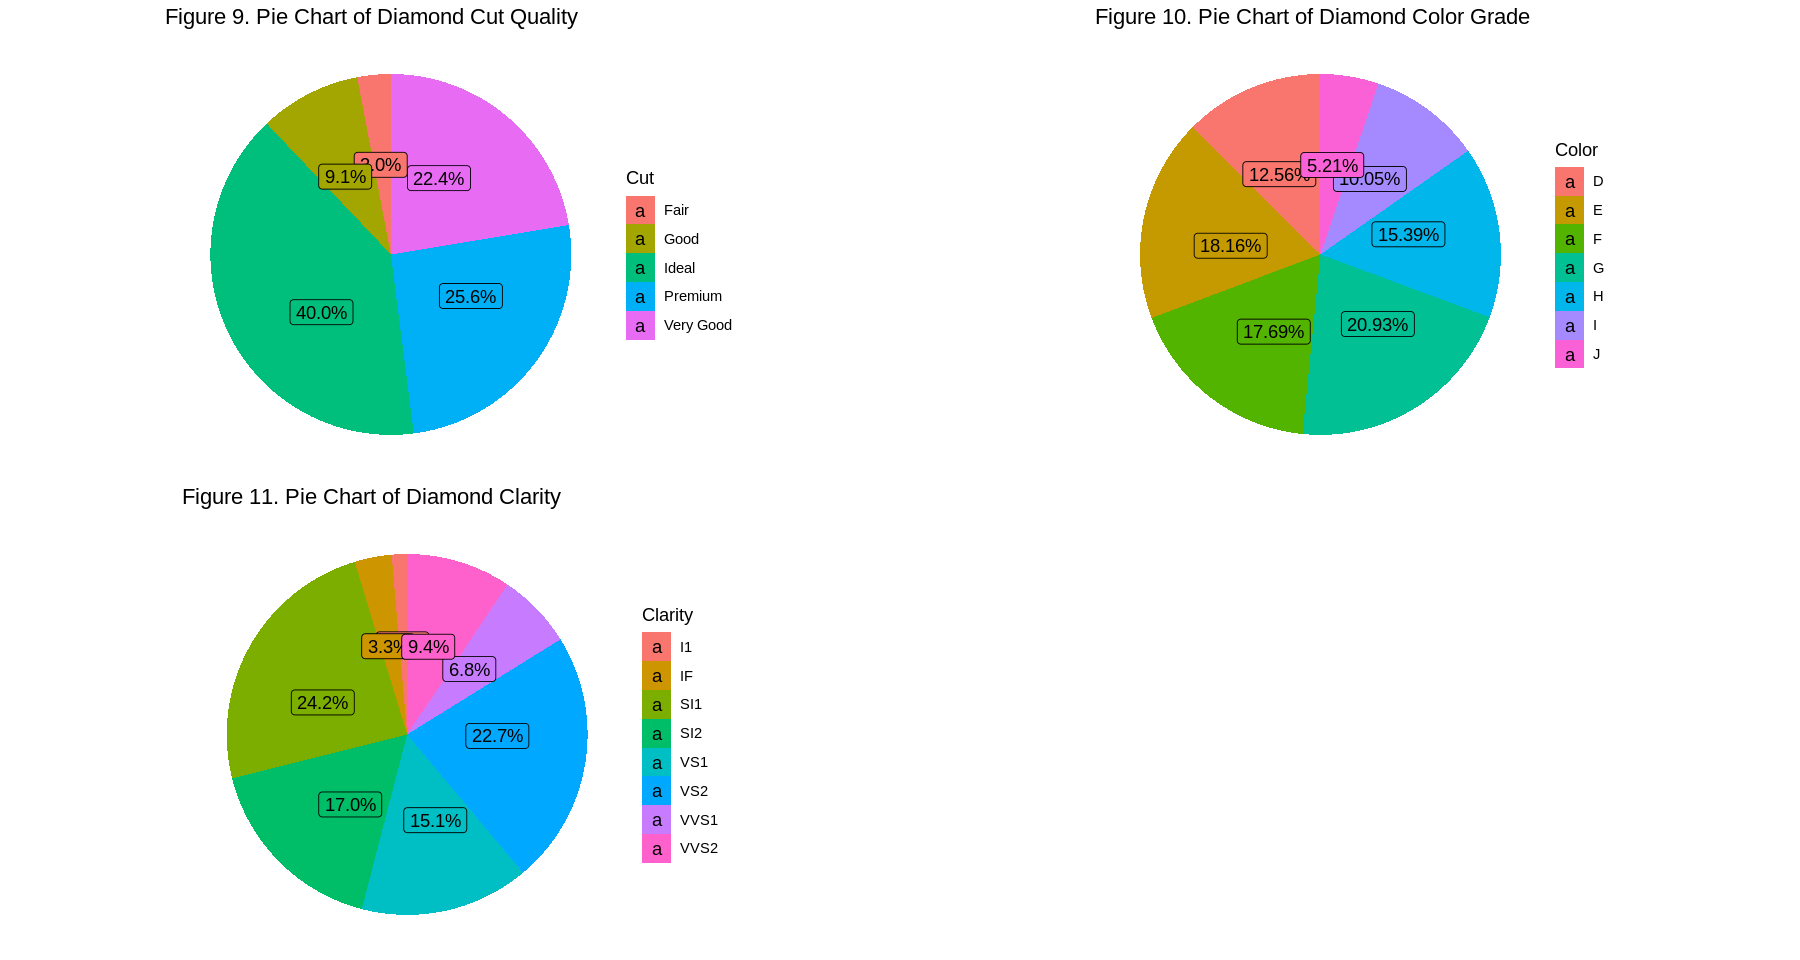

In [14]:
plot_grid(pie_cut, pie_color, pie_clarity, ncol = 2)

- *Insight*: These pie charts show the different levels of the categorical variables. There are quite a few, combining for a total of 20 different levels across categorical variables (`cut`: 5 levels, `color`: 7 levels, `clarity`: 8 levels). We expect that price will increase with higher `cut` quality, `color` grade, and `clarity` of the diamond (Gemological Institute of America, n.d.).

#### 2.1.4. Correlation of Categorical Variables with Response Variable

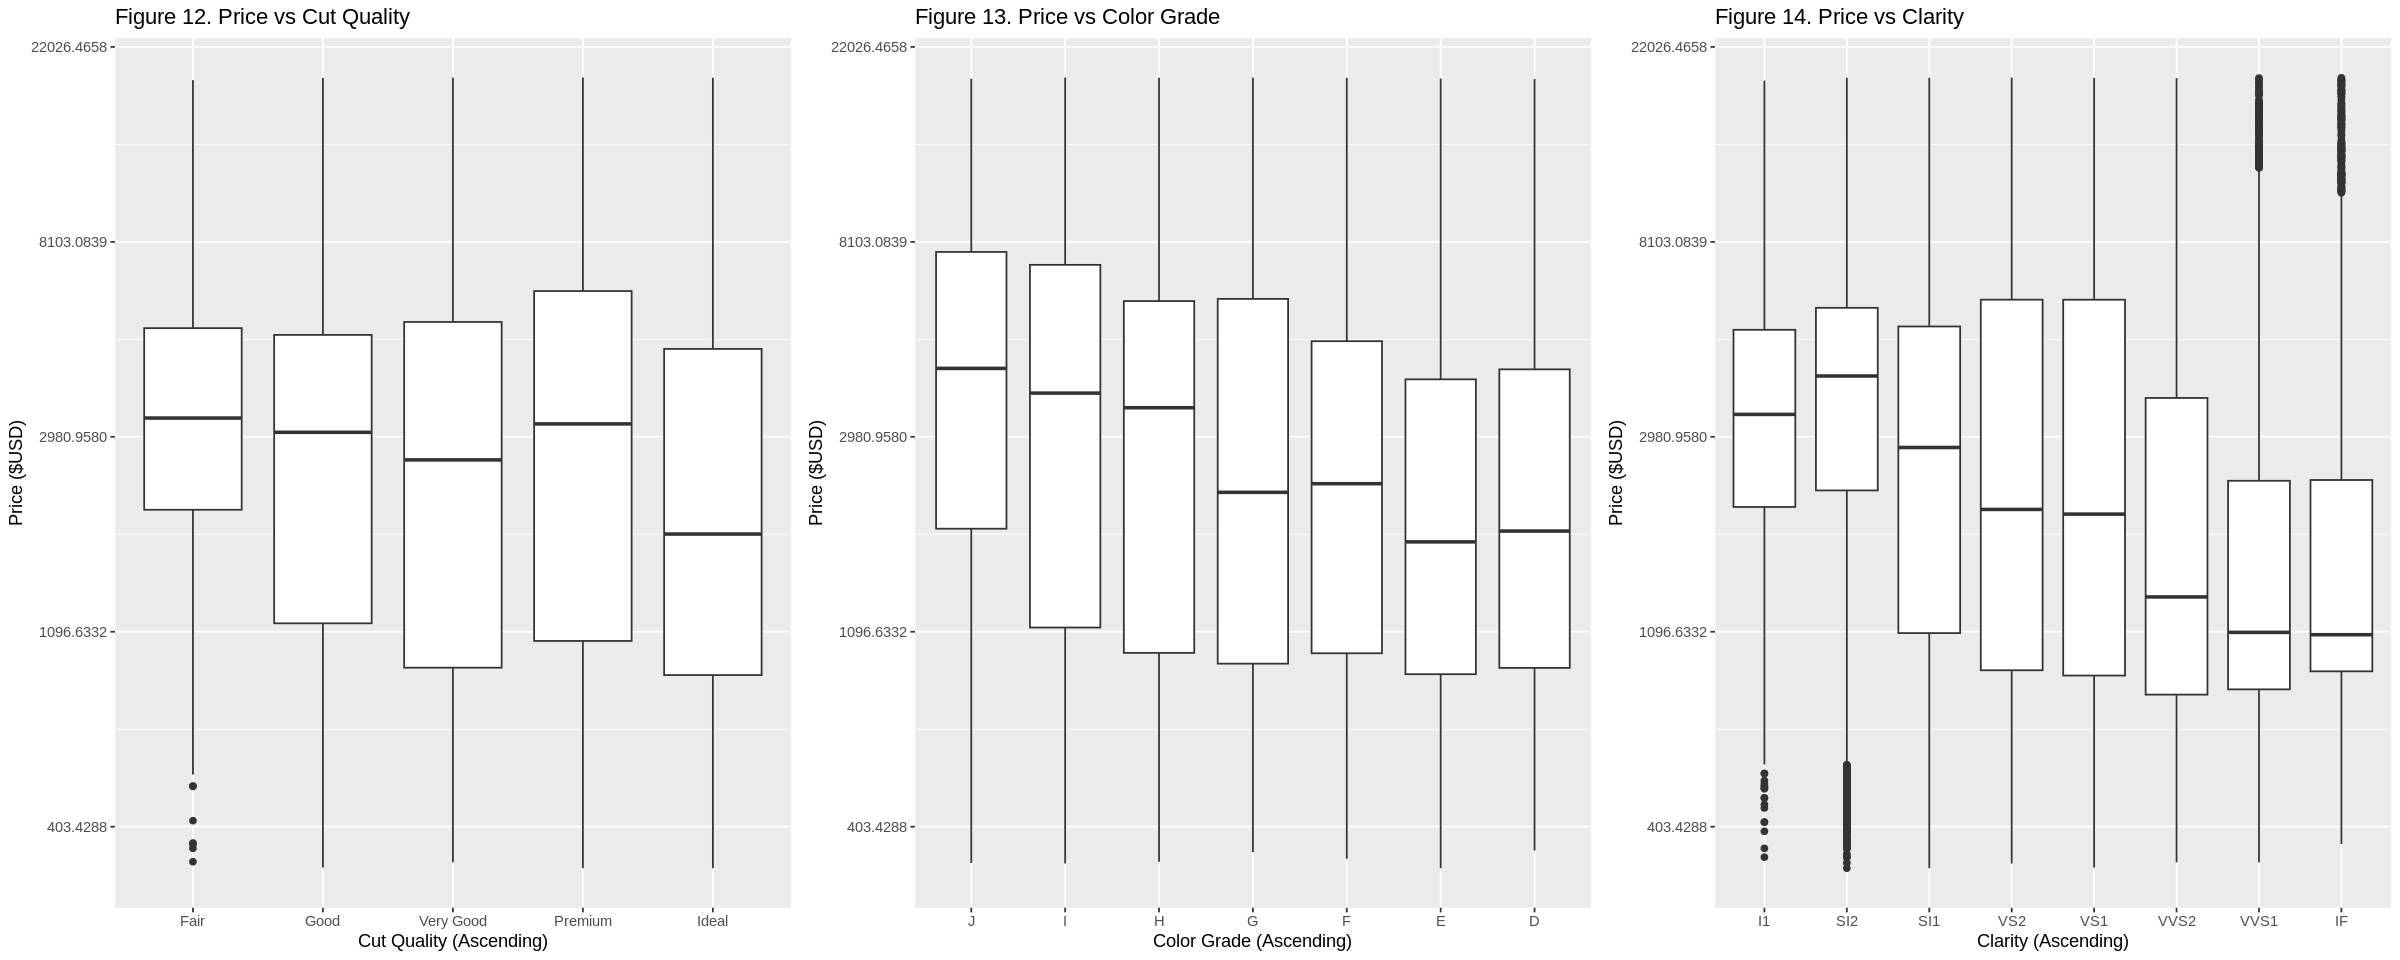

In [15]:
options(repr.plot.width=20, repr.plot.height= 8)

# Ensuring that categories on the x-axis are in ascending order
diamonds_original$cut_ordered <- factor(diamonds_original$cut, levels = c('Fair', 'Good', 'Very Good', 'Premium', 'Ideal'))
diamonds_original$color_ordered <- factor(diamonds_original$color, levels = c('J', 'I', 'H', 'G', 'F', 'E', 'D'))
diamonds_original$clarity_ordered <- factor(diamonds_original$clarity, levels = c('I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'))

# Boxplot for cut quality
box_1 <- diamonds_original |>
    ggplot(aes(x = cut_ordered, y = price)) +
    geom_boxplot() +
    ggtitle("Figure 12. Price vs Cut Quality") +
    labs(x = "Cut Quality (Ascending)", y = "Price ($USD)") +
    scale_y_continuous(trans='log') # Log transform y-axis to deal with the large range in price

# Boxplot for color grade
box_2 <- diamonds_original |>
    ggplot(aes(x = color_ordered, y = price)) +
    geom_boxplot() +
    ggtitle("Figure 13. Price vs Color Grade") +
    labs(x = "Color Grade (Ascending)", y = "Price ($USD)") +
    scale_y_continuous(trans='log') # Log transform y-axis to deal with the large range in price

# Boxplot for clarity
box_3 <- diamonds_original |>
    ggplot(aes(x = clarity_ordered, y = price)) +
    geom_boxplot() +
    ggtitle("Figure 14. Price vs Clarity") +
    labs(x = "Clarity (Ascending)", y = "Price ($USD)") +
    scale_y_continuous(trans='log') # Log transform y-axis to deal with the large range in price

diamonds_box <- ggarrange(box_1, box_2, box_3,
                    ncol = 3, nrow = 1)

diamonds_box

- *Insight*: The box plots above show us the trend between `cut`, `color`, and `clarity` with `price`. The y-axis is log-transformed to better show the change in `price`. All 3 categorical variables appear to be negatively correlated with `price`. Additionally, the relationship between the 3 categorical variables and `price` is relatively linear with some variation in the median value (e.g. "Premium `cut` quality" does not follow the linear trend). Price does not seem to increase with higher quality characteristics, which is not what we expected.

- Following the teaching team's advice, we will exclude categorical variables (cut, clarity, color) for a simpler, more interpretable model, aiming to prevent overfitting. We avoided one-hot encoding to curb complexity (20 total categorical variable levels) and refrained from directly converting ordinal variables to numeric values to avoid misrepresenting the data's characteristics.

In [16]:
# Excluding categorical variables from the dataset
diamonds <- diamonds_original %>% select(-c(cut, clarity, color, cut_ordered, color_ordered, clarity_ordered))

### 2.2. Methods: Plan

#### 2.2.1. Data Splitting

Since we are making a prediction model, we split the data into train, validation, and test sets. The validation set helps compare different models, and the test set is reserved for evaluating the selected best model's performance.


In [17]:
set.seed(1231254)
inds <- partition(diamonds$price, p = c(train = 0.6, valid = 0.2, test = 0.2))
diamond_train_raw <- diamonds[inds$train, ]
diamond_valid <- diamonds[inds$valid, ]
diamond_test <- diamonds[inds$test, ]

#### 2.2.2. Data Preparation (Multicollinearity Check)

Multicollinearity arises when input variables in a model show high correlation, leading to inaccuracies in predictions as significant changes in one variable can impact another. In our EDA above (Figure 8), we observed high correlations among some variables. To address this, we will systematically eliminate the predictor(s) with the highest Variance Inflation Factor (VIF) until all VIF values are below 10, enhancing the stability of our regression model.

In [18]:
set.seed(1234)

# Function for VIF table
calculate_vif <- function(data, response_var = "price") {
  formula_str <- as.formula(paste(response_var, "~ ."))

  mlr <- lm(formula = formula_str, data = data)

  mlr %>%
    vif() %>%
    as.data.frame() %>%
    rename(VIF = ".") %>%
    round(3) %>%
    arrange(desc(VIF)) %>%
    t() %>%
    as.data.frame()
}

# Calculate VIF tables and removing the highest value each time
VIF_table_all <- calculate_vif(diamond_train_raw)
VIF_table_x_removed <- calculate_vif(diamond_train_raw %>% select(-x))
VIF_table_xz_removed <- calculate_vif(diamond_train_raw %>% select(-c(x, z)))

# Combine VIF tables
combined_VIF_table <- bind_rows(
  mutate(Predictors_Removed = "None", VIF_table_all),
  mutate(Predictors_Removed = "x", VIF_table_x_removed),
  mutate(Predictors_Removed = "x, z", VIF_table_xz_removed))

"Table 3. VIF Analysis with Stepwise Predictor Removal"
combined_VIF_table

[1] "Table 3. VIF Analysis with Stepwise Predictor Removal"

,x,z,carat,y,depth,table,Predictors_Removed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
VIF...1,85.891,72.835,20.962,13.736,2.215,1.134,None
VIF...2,NA,26.693,16.558,13.558,1.366,1.133,x
VIF...3,NA,NA,8.466,8.392,1.128,1.133,"x, z"


In [19]:
# based on the VIF table, we'll will remove x and z
diamond_train <- diamond_train_raw %>% select(-c(x,z))

- *Insight:* Initially, we removed `x` with a high VIF of 85.891, but VIF values stayed above 10. In the latest iteration, dropping `z` lowered all VIF values below 10, prompting the removal of both `x` and `z`.

#### 2.2.3. Construction of MLR Models with Various Selection Methods

We will be creating MLR models using the following selection methods:

- `Forward selection`
- `Backward selection`
- `Hybrid selection`
- `Manual selection`
- `Lasso`

> *2.2.3.1. Forward Selection, Backward Selection, Hybrid Selection*

In this section, we performed stepwise selections (forward, backward, and hybrid) on the training set. The script generates a summary table that records the number of input variables associated with the smallest Mallows' $Cp$ value for each method. Then, the script constructs a MLR model using the variables selected through the stepwise process and calculates the validation RMSE.

In [20]:
# Function to perform variable selection and store metrics

perform_selection <- function(method, method_text, train_data) {
  diamond_sel <- regsubsets(
    x = price ~ .,
    nvmax = ncol(train_data) - 1,
    data = train_data,
    method = method
  )

  diamond_sel_summary <- summary(diamond_sel)

  tibble(
    Selection_method = method_text,
    Number_of_input_variables = 1:4,
    Lowest_cp = diamond_sel_summary$cp
  ) %>%
    filter(Lowest_cp == min(diamond_sel_summary$cp))  # Find the number of input variables corresponding to the smallest Cp value
}

# Perform variable selection for different methods
min_cp_results <- bind_rows(
  perform_selection("forward", "Forward Selection", diamond_train),
  perform_selection("backward", "Backward Selection", diamond_train),
  perform_selection("seqrep", "Hybrid Selection", diamond_train))

min_cp_results <- min_cp_results %>%
  cbind(Predictors = "carat+depth+table+y")

# Building a model using the variables selected by the stepwise selection
diamond_model_stepwise <- lm(formula = price ~ ., data = diamond_train)

# Obtaining out-of-sample predictions for `price` from the testing set using the stepwise reduced model
diamond_model_stepwise_test <- predict(object = diamond_model_stepwise, newdata = diamond_valid)

# RMSE
validation_RMSE_all_type_of_stepwise_selection <- tibble(
  Selection_Method = "Forward, Backward, and Hybrid selection",
  Predictors = "carat+depth+table+y",
  Validation_RMSE = rmse(diamond_model_stepwise_test, diamond_valid$price),
)

In [21]:
"Table 4. Minimum Cp Values and Corresponding Predictors for Variable Selection Methods"
min_cp_results

[1] "Table 4. Minimum Cp Values and Corresponding Predictors for Variable Selection Methods"

Selection_method,Number_of_input_variables,Lowest_cp,Predictors
<chr>,<int>,<dbl>,<chr>
Forward Selection,4,5,carat+depth+table+y
Backward Selection,4,5,carat+depth+table+y
Hybrid Selection,4,5,carat+depth+table+y


In [22]:
"Table 5. Validation RMSE for Models Generated by Forward, Backward, and Hybrid Selection"
validation_RMSE_all_type_of_stepwise_selection

[1] "Table 5. Validation RMSE for Models Generated by Forward, Backward, and Hybrid Selection"

Selection_Method,Predictors,Validation_RMSE
<chr>,<chr>,<dbl>
"Forward, Backward, and Hybrid selection",carat+depth+table+y,1510.599


- *Insight*: In Table 4, the forward, backward, and hybrid selection methods all converged on the inclusion of four variables: `carat`, `depth`, `table`, and `y`. Subsequently, an additive linear regression model was constructed using these chosen predictors, resulting in a validation RMSE of 1510.599, as detailed in Table 5.


> *2.2.3.2. Manual Selection*


In this subsection, we manually explore different combinations of predictors for linear regression models, creating additive and interactive formulas. The script below evaluates each model's performance on the validation set, calculates the RMSE, and selects the model with the lowest RMSE as the optimal manual selection, storing the results in `validation_RMSE_manual_selection`.

In [23]:
# Extract predictors
Diamonds_variables <- colnames(diamond_train[, setdiff(names(diamond_train), "price")])

# Function to create formulas
create_formulas <- function(variables, operator) {
  formulas <- list()
  for (i in seq_along(variables)) {
    tmp <- combn(variables, i)
    tmp <- apply(tmp, 2, paste, collapse = operator)
    tmp <- paste0("price~", tmp)
    formulas[[i]] <- tmp
  }
  unlist(formulas)
}

# Create additive and interactive formulas, and combine it
formulas_additive <- create_formulas(Diamonds_variables, "+")
formulas_interactive <- create_formulas(Diamonds_variables, "*")
all_formulas <- c(formulas_additive, formulas_interactive)

# Pre-allocate data frame
results <- data.frame(Selection_Method = character(),
                      Predictors = character(),
                      validation_RMSE = numeric(),
                      stringsAsFactors = FALSE)

for (i in seq_along(all_formulas)) {
  formula <- as.formula(all_formulas[i])
  lm_model <- lm(formula, data = diamond_train)
  predictions <- predict(lm_model, newdata = diamond_valid)
  model_value <- sub("^.*~", "", as.character(all_formulas[i]))
  validation_RMSE_value <- rmse(predictions, diamond_valid$price)

  # Append to data frame
  results <- rbind(results, data.frame(Selection_Method = "Manual Selection",
                                        Predictors = model_value,
                                        Validation_RMSE = validation_RMSE_value))
}

# Find all models based on the lowest test RMSE
validation_RMSE_manual_selection <- results  %>% unique() %>% arrange(Validation_RMSE) %>% slice(1)

In [24]:
"Table 6. Validation RMSE for Best Model Generated by Manual Variable Selection"
validation_RMSE_manual_selection

[1] "Table 6. Validation RMSE for Best Model Generated by Manual Variable Selection"

Selection_Method,Predictors,Validation_RMSE
<chr>,<chr>,<dbl>
Manual Selection,carat*depth*table*y,1459.476


- *Insight*: The output shows the optimal model, chosen through manual variable selection, includes `carat`, `depth`, `table`, and `y` as predictors, achieving a validation RMSE of 1459.476.

> *2.2.3.3. LASSO*

In this section, we performed LASSO selection on the training set, creating an additive formula for linear regression model. RMSE is calculated to compare the performance with other models.

In [25]:
# Use diamond_train_raw because lasso selection will detect the multicolinearity itself
diamonds_X_train <- model.matrix(object = price ~ .,
  data = diamond_train_raw)[, -1]

diamonds_Y_train <- diamond_train_raw[, "price"]

lasso_model <-
    cv.glmnet(diamonds_X_train,
              diamonds_Y_train,
              alpha = 1)

# Extract the coefficients by lasso selection
beta_lasso <- coef(lasso_model, s = lasso_model$lambda.min)

# Resulting variables are carat, depth, table and x. Let's fit a linear model by least squares, and use it to predict.
prediction_model_lasso <- lm(price ~ carat + depth + table + x, diamond_train_raw)

# summary(prediction_model) # to make page more concise to read, we do not show it below
# the results show all the p-values are far less than 0.01, which indicate we have enough evidence to reject null hypothesis.

diamonds_price_pred <- predict(prediction_model_lasso, diamond_valid)

# compute rmse to see performance of lasso model
validation_RMSE_LASSO_selection <- tibble(
  Selection_Method = "Lasso selection",
  Predictors = "carat+depth+table+x",
  Validation_RMSE = Metrics::rmse(diamonds_price_pred, diamond_valid$price)

)

In [26]:
"Table 7. Validation RMSE for Best Model Generated by LASSO Selection"
validation_RMSE_LASSO_selection

[1] "Table 7. Validation RMSE for Best Model Generated by LASSO Selection"

Selection_Method,Predictors,Validation_RMSE
<chr>,<chr>,<dbl>
Lasso selection,carat+depth+table+x,1489.39


- *Insight*: The output shows the optimal model, chosen through LASSO variable selection, includes `carat`, `depth`, `table`, and `x` as predictors, achieving a validation RMSE of 1489.39.

> 2.2.3.4. Comparing Models

In [27]:
# summary of all selection methods and their validation RMSE
summary_test_RMSE <- rbind(
    validation_RMSE_all_type_of_stepwise_selection,
    validation_RMSE_manual_selection,
    validation_RMSE_LASSO_selection) %>%
arrange(Validation_RMSE)

In [28]:
"Table 8. Model Selection Comparison"
summary_test_RMSE

[1] "Table 8. Model Selection Comparison"

Selection_Method,Predictors,Validation_RMSE
<chr>,<chr>,<dbl>
Manual Selection,carat*depth*table*y,1459.476
Lasso selection,carat+depth+table+x,1489.390
"Forward, Backward, and Hybrid selection",carat+depth+table+y,1510.599


- *Insight*: The table summarizes the above selection methods and their model validation RMSE. The model selected through the manual selection method has the lowest validation RMSE, indicating better predictive performance compared to the other two models. Hence, we'll evaluate the manual selection model on the test set for further insights.

### 2.2.4. Best Model Evaluation on Test Set

In [29]:
best_model_manual <- lm(formula = price ~ carat*depth*table*y, data = diamond_train)
best_model_predict_on_test <- predict(object = best_model_manual, newdata = diamond_test)

# calculate manual model's RMSE
manual_model_test_rmse <- Metrics::rmse(best_model_predict_on_test, diamond_test$price)

# store manual model's RMSE in a tibble
diamond_test_rmses <- tibble(
  Model = "Best Model (Manual)",
  Test_RMSE = manual_model_test_rmse)

In [30]:
"Table 9. RMSE for Best Model (Manual Selection) Evaluated on Test Set"
diamond_test_rmses

[1] "Table 9. RMSE for Best Model (Manual Selection) Evaluated on Test Set"

Model,Test_RMSE
<chr>,<dbl>
Best Model (Manual),1471.963


### 2.2.5. Best Model Compared to Null Model

In [31]:
"Table 10. Summary Statistics for Best Model Compared to Null Model (Intercept-only)"
glance(best_model_manual)

[1] "Table 10. Summary Statistics for Best Model Compared to Null Model (Intercept-only)"

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8620744,0.8620104,1479.429,13478.11,0,15,-282135.2,564304.5,564447,7.0796e+10,32346,32362


- *Insight*: Table 10 shows the goodness-of-fit of our best model (selected by manual selection) compared to an intercept-only model. We are getting an adjusted-$R^2$ value of ~0.862 with a p-value of 0.

## 3. Discussion

### 3.1. Key Findings

We found that the model created through manual selection gave us the lowest RMSE value compared to the other methods. This result was expected as our manual selection algorithm iterated through all possible model input variables and types while the other algorithms were constrained to additive models.

The final RMSE using manual selection on the test set was 1471.963. This means that on average, our predictions differ from the actual price value by ~1471.96 USD (keeping in mind `price` range: [326 USD to 18,823 USD]).

Our best model outperforms the baseline intercept-only null model, giving us an adjusted-$R^2$ value of ~0.86. This means that about 86% of the variation in `price` can be explained by an interaction model with the following input variables: `carat`, `depth`, `table`, `y`. Thus, the model fits well to the data as it is able to explain a large portion of variation in `price`.

### 3.2. Model Improvement Suggestion

The model could be improved if the categorical variables in the dataset could be used as they exhibited relatively linear correlation with the response variable (Figure 9, 10, 11).

The function `stepAIC()` (MASS package) could be explored to include these categorical variables in the variable selection process. Furthermore, while we refrained from using one-hot encoding due to its complexity on our multi-level categorical variables, this option could be explored selectively on certain variables to see if it would improve the model's performance.

### 3.3. Future Research Directions

For this analysis, we were limited to using linear regression with numerical variables to predict diamond prices. Further research on this topic could be explored with non-linear models such as decision trees and K-nearest neighbors to achieve more accurate predictions (Mihir et al., 2021).

Diamonds are a crucial and precious resource that has been traded and used in various industries across the world (Spar, 2006). Thus, it is worth considering how more accurate predictive modelling can allow for better facilitation of global diamond trade to ensure fair prices for both nations and consumers alike (Mihir et al., 2021; Spar, 2006; Mamonov & Triantoro, 2018).

## 4. Reference

Dimson, E., & Spaenjers, C. (2014). *Investing in emotional assets*. Financial Analysts Journal, 70(2), 20-25.

Dimson, E., & Spaenjers, C. (2011). *Ex post: The investment performance of collectible stamps*. Journal of Financial Economics, 100(2), 443-458.

Gemological Institute of America. (n.d.). *Diamond Quality Factors*. https://www.gia.edu/diamond-quality-factor#:~:text=It's%20really%20a%20simple%20concept,also%20costs%20more%20per%20carat.

Mamonov, S., & Triantoro, T. (2018). *Subjectivity of Diamond Prices in Online Retail: Insights from a Data Mining Study*. Journal of Theoretical and Applied Electronic Commerce Research, 13(2), 15-28. https://doi.org/10.4067/s0718-18762018000200103

Mihir, H., Patel, M. I., Jani, S., & Gajjar, R. (2021). *Diamond price prediction using machine learning*. 2021 2nd International Conference on Communication, Computing and Industry 4.0 (C2I4) (pp. 1-5). Bangalore, India. doi:10.1109/C2I454156.2021.9689412.

Santini, L. (2009, December 17). *Diamonds Hold Allure as Gem of an Investment.* The Wall Street Journal. https://www.wsj.com/articles/SB126099490068094349

Shivam, A. (2016). Diamonds. *Kaggle*. Retrieved November 6, 2023, from https://www.kaggle.com/datasets/shivam2503/diamonds

Spar, D. L. (2006). *Markets: Continuity and change in the international diamond market*. Journal of Economic Perspectives, 20(3), 195-208. https://doi.org/10.1257/jep.20.3.195